## Testing the BPASS isochrone at 10^9.2 years age. Using Duchene & Krauss (2013) multiplicity)
In this BPASS isochrone and cluster plot, I go over the BPASS isochrone for 9.2 billion years age, 0.1 times solar metallicity, AKs=0.0, and distance of 2000 parsecs from Earth. From the isochrone and cluster, we discuss several plots such as the log_g frequency distribution of the isochrone, the color magnitude diagram (B-V vs M_V), and the mass luminosity relationship of the cluster. 
Other notes:

I have chosen dist to cluster = 2000 pc to further distinguish this notebook from the other 10^9.2 year old isochrone Notebook.

In [1]:
import spisea
from spisea import evolution, synthetic
import math
# Check if the evolution class works fine
import time
t1=time.time()
bps=evolution.BPASS()
iso1=synthetic.Isochrone_Binary(9.2, 0.0, 2000,math.log10(0.1), mass_sampling=1)

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in /g/lu/models/cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/refs.py:125: UserWarning: No thermal tables found, no thermal calculations can be performed. No files found for /g/lu/models/cdbs/mtab/*_tmt.fits
  'no thermal calculations can be performed. ' + str(e))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/u/ryotainagaki/Desktop/PyPopStar/spisea/evolution.py:1792: RuntimeWarning: overflow encountered in power
  (1 / cs.au) * un.m)
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:479: RuntimeWarning: divide by zero encountered in true_divide
  result 

Changing to logg=5.00 for T= 20715 logg=7.07
Changing to logg=5.00 for T= 24351 logg=5.62
Changing to logg=5.00 for T= 32004 logg=6.49
Changing to logg=5.00 for T= 39903 logg=7.00
Changing to logg=5.00 for T= 24344 logg=7.21
Changing to logg=5.00 for T= 21592 logg=5.57
Changing to logg=5.00 for T= 23312 logg=7.37
Changing to logg=5.00 for T= 18255 logg=5.15
Changing to logg=5.00 for T= 24030 logg=7.31
Changing to logg=5.00 for T= 31527 logg=6.41
Changing to logg=5.00 for T= 17441 logg=5.06
Changing to T= 50000 for T= 67073 logg=5.76
Changing to logg=5.00 for T= 67073 logg=5.76
Changing to logg=5.00 for T= 33534 logg=6.57
Changing to logg=5.00 for T= 39646 logg=6.99
Changing to logg=5.00 for T= 45852 logg=7.73
Changing to logg=5.00 for T= 23534 logg=7.23
Changing to logg=5.00 for T= 30895 logg=6.47
Changing to logg=5.00 for T= 29347 logg=7.82
Changing to logg=5.00 for T= 24339 logg=5.63
Changing to logg=5.00 for T= 22601 logg=7.33
Changing to logg=5.00 for T= 22989 logg=5.52
Changing to

For a sanity check, we can see that the primaries, secondaries, and single stars have phasees of 5 or of 101 or 102 or 103 or -99. 

In [2]:
import numpy as np
np.all([(x == 5 or x == 101 or x == 102 or
         x == 103) for x in iso1.primaries['phase']])

True

In [3]:
np.all([(x == 5 or x == 101 or x == 102 or
         x == 103) for x in iso1.singles['phase']])

True

In [4]:
np.all([(x == 5 or x == 101 or x == -99 or x==102 or x==103) for x in iso1.secondaries['phase']])

True

Find the maximum, mean, and median  values of logg (cgs) for primaries and secondaries accounting for NaNs in the columns. (For max we make NaNs the same as - infinity and for median and mean, we do not include them)

In [5]:
np.max(iso1.singles['logg'])

9.294221355125417

In [6]:
np.max(np.nan_to_num(iso1.primaries['logg'], -np.inf))

9.294221355125417

In [7]:
np.max(np.nan_to_num(iso1.secondaries['logg'], -np.inf))

9.294186013434684

Now let's find the mean and median logg values for the single stars, secondary stars, and the primary stars

In [8]:
np.mean(iso1.singles['logg'][np.where(~np.isnan(iso1.singles['logg']))])

6.478614555246956

In [9]:
np.mean(iso1.primaries['logg'][np.where(~np.isnan(iso1.primaries['logg']))])

6.829825080157124

In [10]:
np.mean(iso1.secondaries['logg'][np.where(~np.isnan(iso1.secondaries['logg']))])

5.360931066484793

In [11]:
np.median(iso1.singles['logg'][np.where(~np.isnan(iso1.singles['logg']))])

7.939597169306249

In [12]:
np.median(iso1.primaries['logg'][np.where(~np.isnan(iso1.primaries['logg']))])

8.079390004361564

In [13]:
np.median([x for x in iso1.secondaries['logg'] if np.isfinite(x)])

4.499390136742458

Let's make a histogram of log_g values for each table of the isochrone

Text(0.5, 0, 'logg in cgs')

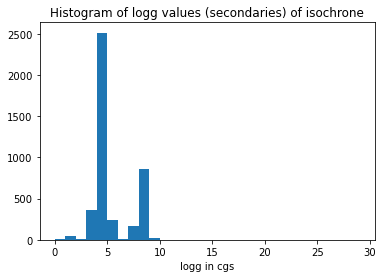

In [14]:
import matplotlib.pyplot as plt
plt.title("Histogram of logg values (secondaries) of isochrone")
plt.hist(np.array([x for x in iso1.secondaries['logg'] if np.isfinite(x)]), np.arange(0, 30, 1))
plt.xlabel("logg in cgs")

Text(0.5, 0, 'logg in cgs')

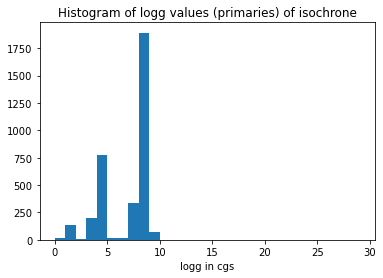

In [15]:
import matplotlib.pyplot as plt
plt.title("Histogram of logg values (primaries) of isochrone")
plt.hist(np.array([x for x in iso1.primaries['logg'] if np.isfinite(x)]), np.arange(0, 30, 1))
plt.xlabel("logg in cgs")

Text(0.5, 0, 'logg in cgs')

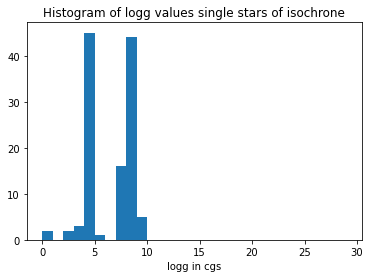

In [16]:
import matplotlib.pyplot as plt
plt.title("Histogram of logg values single stars of isochrone")
plt.hist(np.array([x for x in iso1.singles['logg'] if np.isfinite(x)]), np.arange(0, 30, 1))
plt.xlabel("logg in cgs")

For comparison, let's create a MIST v.1. isochrone  phot using otherwise same parameters.

In [17]:
iso2=synthetic.IsochronePhot(9.2, 0.0, 2000, math.log10(0.1), recomp=False) # New MIST v.1 isochrone for same metallicity

Note: dist/10 pc = 200 for both of our isochrones and clusters

Find the maximum logg of the isochrone and the distribution of logg values

In [18]:
np.max(iso2.points['logg'])

7.938784080569296

(array([519., 146., 185.,  81., 227.,  67.,  21., 128.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <BarContainer object of 29 artists>)

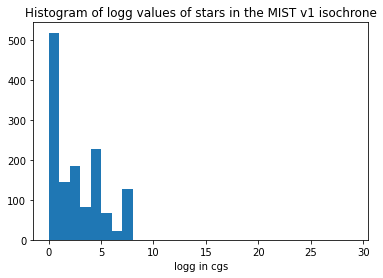

In [19]:
import matplotlib.pyplot as plt
plt.xlabel("logg in cgs")
plt.title("Histogram of logg values of stars in the MIST v1 isochrone")
plt.hist(np.array([x for x in iso2.points['logg'] if np.isfinite(x)]), np.arange(0, 30, 1))

Finding the log_g median and mean for the new isochrone

In [20]:
np.median(iso2.points['logg'])

2.0655075179623505

In [21]:
np.mean(iso2.points['logg'])

2.62397473907989

Now we want to make clusters for both of these models. We want to compare stellar mass distributions of these clusters.

In [22]:
from spisea import imf
from spisea.imf import imf, multiplicity
from spisea import ifmr


In [23]:
clus_1=synthetic.Cluster_w_Binaries(iso1, imf.Kennicutt_1983(multiplicity=multiplicity.MultiplicityResolvedDK()),
                                    200000, ifmr=ifmr.IFMR_Spera15())
clus_2=synthetic.ResolvedCluster(iso2, imf.Kennicutt_1983(multiplicity=multiplicity.MultiplicityResolvedDK()),
                                 200000, ifmr=ifmr.IFMR_Spera15())

24990 single stars had to be deleted
4461.863301953617 solar masses had to be deleted from single stars before application of the IFMR


/u/ryotainagaki/Desktop/PyPopStar/spisea/synthetic.py:728: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  compMass = np.array([compMass[x] for x in indices])


Running the changing phase on companions
10 non-single star systems had to be deleted before IFMR application
5561 companions had to be deleted before IFMR was applied
Found 4874 stars out of mass range
Found 5722 companions out of stellar mass range


Now, I plot the mass distribution of all non-compact remnant stars in both the MIST v.1 and the 

In [24]:
star_systems = clus_1.star_systems
companions = clus_1.companions
prims = [star_systems['mass_current'][x] for x in range(len(star_systems)) if star_systems['phase'][x] == 5]
companions = [companions['mass_current'][x] for x in range(len(companions)) if companions['phase'][x] == 5]

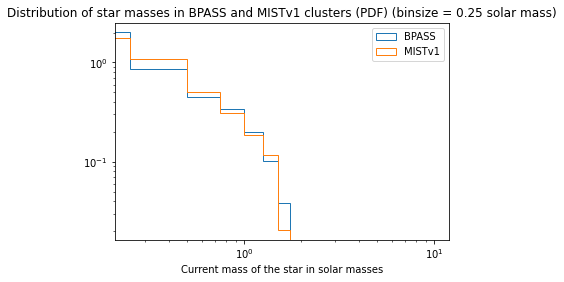

In [25]:
plt.hist(np.array(prims+companions), 40, (0, 10), density=True, histtype='step', label="BPASS")
star_systems2 = clus_2.star_systems
companions2 = clus_2.companions
prims = [star_systems2['mass_current'][x] for x in range(len(star_systems2)) if star_systems2['phase'][x] < 101]
companions = [companions2['mass_current'][x] for x in range(len(companions2)) if companions2['phase'][x] < 101]
plt.hist(np.array(prims+companions), 40, (0, 10), density=True, histtype='step', label="MISTv1")
plt.xlabel("Current mass of the star in solar masses")
plt.title("Distribution of star masses in BPASS and MISTv1 clusters (PDF) (binsize = 0.25 solar mass)")
plt.xscale('log')
plt.yscale('log')
plt.legend()